In [130]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import chi2_contingency, ks_2samp
import warnings
warnings.filterwarnings("ignore")

In [131]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Doll03/4IZ480/main/Data/TimeDeposit_10K.csv', sep=";")


In [132]:
dataset.Time_Deposits_Flag.value_counts()


F    9897
T     103
Name: Time_Deposits_Flag, dtype: int64

In [133]:
dataset["Customer_ID"] = dataset["Customer_ID"].astype("object")
dataset["Birth_Date"] = dataset["Birth_Date"].astype("datetime64")
dataset["Ref_Date"] = dataset["Ref_Date"].astype("datetime64")
dataset["Gender"] = [True if i == "Male" else False for i in dataset['Gender']]# 1=Male 0=Female
dataset["Marital_Status"] = dataset["Marital_Status"].astype("category")
dataset["Children_Num"] = dataset["Children_Num"].astype("category")
dataset["Occupation_Category"] = dataset["Occupation_Category"].astype("category")
dataset["Payroll_Flag"] = dataset["Payroll_Flag"].astype("bool")
dataset["Business_Flag"] = dataset["Business_Flag"].astype("bool")
dataset["Saving_Current_Accounts_Flag"] = dataset["Saving_Current_Accounts_Flag"].astype("bool")
dataset["Investment_Products_Flag"] = dataset["Investment_Products_Flag"].astype("bool")
dataset["Insurance_Products_Flag"] = dataset["Insurance_Products_Flag"].astype("bool")
dataset["Business_Loans_Flag"] = dataset["Business_Loans_Flag"].astype("bool")
dataset["Housing_Loans_Flag"] = dataset["Housing_Loans_Flag"].astype("bool")
dataset["Consumer_Loans_Flag"] = dataset["Consumer_Loans_Flag"].astype("bool")
dataset["Credit_Cards_Flag"] = dataset["Credit_Cards_Flag"].astype("bool")
dataset["Time_Deposits_Flag"] = [True if i == "T" else False for i in dataset['Time_Deposits_Flag']]



In [134]:
dataset.Time_Deposits_Flag.value_counts()


False    9897
True      103
Name: Time_Deposits_Flag, dtype: int64

In [135]:
#Creating boolean variables 
dataset["Credit_Cards_Installments_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Installments']]
dataset["Credit_Cards_Payments_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Payments_Num']]
dataset["Credit_Cards_Purchases_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Purchases_Num']]
dataset["Credit_Cards_Witrhdrawals_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Witrhdrawals_Num']]
dataset["Internet_Trans_Flag"] = [True if i > 0 else False for i in dataset['Internet_Trans_Num']]
dataset["Deposit_Trans_Flag"] = [True if i > 0 else False for i in dataset['Deposit_Trans_Num']]
dataset["Payment_Trans_Flag"] = [True if i > 0 else False for i in dataset['Payment_Trans_Num']]
dataset["Transfer_Trans_Flag"] = [True if i > 0 else False for i in dataset['Transfer_Trans_Num']]
dataset["Withdrawl_Trans_Flag"] = [True if i > 0 else False for i in dataset['Withdrawl_Trans_Num']]

In [136]:
#Creating variable Age_Cat
dataset['Age'] = dataset['Ref_Date'].dt.year - dataset['Birth_Date'].dt.year
Age_Cat = pd.cut(dataset['Age'], bins=[0, 32.50, 51.50, 60.50, 150],labels=['Younger', 'LowerMid', 'UpperMid', 'Older'])
Age_Cat

0       LowerMid
1       LowerMid
2       UpperMid
3       UpperMid
4       LowerMid
          ...   
9995     Younger
9996    LowerMid
9997    LowerMid
9998    LowerMid
9999     Younger
Name: Age, Length: 10000, dtype: category
Categories (4, object): ['Younger' < 'LowerMid' < 'UpperMid' < 'Older']

In [137]:
#cat_v_list = [i for i in list(dataset.columns) if i not in num_v_list]
dataset['Time_Deposits_Flag']=dataset['Time_Deposits_Flag'].astype('category')

In [138]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Customer_ID                       10000 non-null  object        
 1   Gender                            10000 non-null  bool          
 2   Birth_Date                        10000 non-null  datetime64[ns]
 3   Ref_Date                          10000 non-null  datetime64[ns]
 4   Marital_Status                    10000 non-null  category      
 5   Children_Num                      10000 non-null  category      
 6   Occupation_Category               10000 non-null  category      
 7   Total_Income                      10000 non-null  float64       
 8   Payroll_Flag                      10000 non-null  bool          
 9   Business_Flag                     10000 non-null  bool          
 10  Saving_Current_Accounts_Flag      10000 non-nul

In [139]:
dataset = dataset.drop(["Ref_Date","Birth_Date","Customer_ID","Age" ], axis = "columns")

In [140]:
#crealing list of categorical variables
cat_v_list = [i for i in list(dataset.columns) if (dataset[i].dtypes in ['O', 'bool', "category"])]
cat_v_list.remove('Time_Deposits_Flag')

#creating list of numerical variables
num_v_list = [i for i in list(dataset.columns) if i not in cat_v_list]
num_v_list.remove('Time_Deposits_Flag')
print("Num:", num_v_list, "end=", "Cat:", cat_v_list)


Num: ['Total_Income', 'Saving_Current_Balance', 'Investment_Products_Balance', 'Insurance_Balances', 'Business_Loans_Balance', 'Housing_Loans_Balance', 'Consumer_Loans_Balance', 'Credit_Cards_Balance', 'Branch_Trans_Num', 'ATM_Trans_Num', 'APS_Trans_Num', 'Phone_Trans_Num', 'Internet_Trans_Num', 'Deposit_Trans_Num', 'Withdrawl_Trans_Num', 'Payment_Trans_Num', 'Transfer_Trans_Num', 'Deposit_Trans_Amount', 'Withdrawl_Trans_Amount', 'Payment_Trans_Amount', 'Transfer_Trans_Amount', 'Credit_Cards_Installments', 'Credit_Cards_Payments_Num', 'Credit_Cards_Purchases_Num', 'Credit_Cards_Witrhdrawals_Num', 'Credit_Cards_Payments_Amount', 'Credit_Cards_Purchases_Amount', 'Credit_Cards_Witrhdrawals_Amount', 'Arrears_Months_Max'] end= Cat: ['Gender', 'Marital_Status', 'Children_Num', 'Occupation_Category', 'Payroll_Flag', 'Business_Flag', 'Saving_Current_Accounts_Flag', 'Investment_Products_Flag', 'Insurance_Products_Flag', 'Business_Loans_Flag', 'Housing_Loans_Flag', 'Consumer_Loans_Flag', 'Credit

In [141]:
#Creating a list and graphs for storing numerical features
#num_v_list = list(dataset[["Total_Income"]].columns)
#sns.kdeplot(x = dataset[num_v_list])
#plt.show()


In [142]:
dataset[dataset["Time_Deposits_Flag"] == True]

,Gender,Marital_Status,Children_Num,Occupation_Category,Total_Income,Payroll_Flag,Business_Flag,Saving_Current_Accounts_Flag,Investment_Products_Flag,Insurance_Products_Flag,...,Time_Deposits_Flag,Credit_Cards_Installments_Flag,Credit_Cards_Payments_Flag,Credit_Cards_Purchases_Flag,Credit_Cards_Witrhdrawals_Flag,Internet_Trans_Flag,Deposit_Trans_Flag,Payment_Trans_Flag,Transfer_Trans_Flag,Withdrawl_Trans_Flag
44,True,Married,0.0,Retirees,108042.0,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
69,True,Married,0.0,Employees,11585.0,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
72,True,Married,2.0,Employees,22262.0,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
143,True,Married,0.0,Self-Employees,39156.0,False,False,True,False,False,...,True,False,False,False,False,False,True,False,True,True
147,False,Married,0.0,Retirees,8794.0,False,False,True,True,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9708,False,Single,0.0,Employees,15714.0,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
9722,False,Married,0.0,Self-Employees,25232.0,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
9774,True,Married,0.0,Rentiers,7267.0,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
9975,False,Married,2.0,Rentiers,2750.0,False,False,True,False,False,...,True,True,True,True,False,False,True,False,False,True


In [143]:
cat_v_list

['Gender',
 'Marital_Status',
 'Children_Num',
 'Occupation_Category',
 'Payroll_Flag',
 'Business_Flag',
 'Saving_Current_Accounts_Flag',
 'Investment_Products_Flag',
 'Insurance_Products_Flag',
 'Business_Loans_Flag',
 'Housing_Loans_Flag',
 'Consumer_Loans_Flag',
 'Credit_Cards_Flag',
 'Credit_Cards_Installments_Flag',
 'Credit_Cards_Payments_Flag',
 'Credit_Cards_Purchases_Flag',
 'Credit_Cards_Witrhdrawals_Flag',
 'Internet_Trans_Flag',
 'Deposit_Trans_Flag',
 'Payment_Trans_Flag',
 'Transfer_Trans_Flag',
 'Withdrawl_Trans_Flag']

In [144]:
!pip install itertoolsitertoolpip

ERROR: Could not find a version that satisfies the requirement itertoolsitertoolpip (from versions: none)
ERROR: No matching distribution found for itertoolsitertoolpip


In [145]:
from itertools import tee, islice, chain

def previous_and_next(some_iterable):
    prevs, items, nexts = tee(some_iterable, 3)
    prevs = chain([None], prevs)
    nexts = chain(islice(nexts, 1, None), [None])
    return zip(items, nexts)

In [146]:
axis.ravel()[0]

<AxesSubplot:title={'center':'Gender (Target == 0)'}, xlabel='Gender', ylabel='count'>

In [147]:
i

22

In [148]:
cat_v_list[i]

IndexError: list index out of range

In [ ]:
x

22

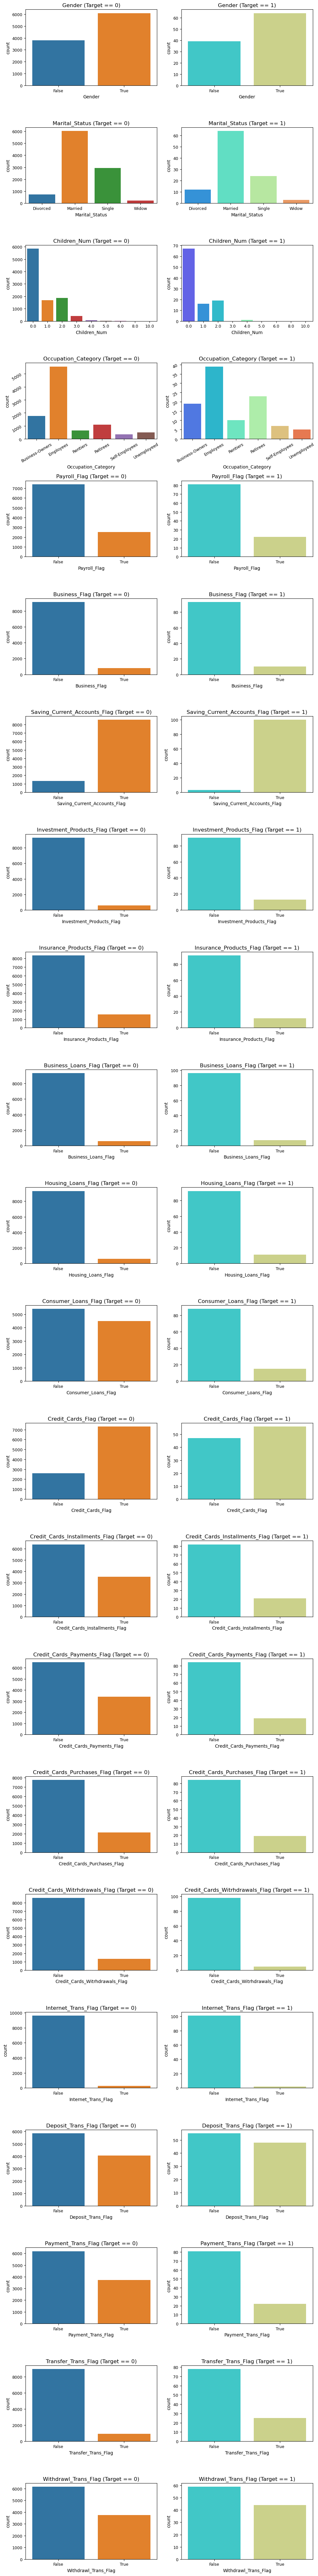

In [ ]:
#Creating a list and graphs for storing categorical features.


figure,axis = plt.subplots(22,2, figsize=(10,80))

col_ind=0
axis_count = 0

for ax in axis.ravel():

    if axis_count % 2 == 0:
        sns.countplot(data=dataset[dataset["Time_Deposits_Flag"] == False], x=cat_v_list[col_ind], ax = ax)
        ax.set_title(cat_v_list[col_ind]+" (Target == 0)")

        if cat_v_list[col_ind] == "Occupation_Category":
            ax.tick_params(axis='both', which='major', labelsize=9, rotation = 30)
        else:
            ax.tick_params(axis='both', which='major', labelsize=9)
        
    else:
        sns.countplot(data=dataset[dataset["Time_Deposits_Flag"] == True], x=cat_v_list[col_ind], ax = ax, palette='rainbow')
        ax.set_title(cat_v_list[col_ind]+" (Target == 1)")

        if cat_v_list[col_ind] == "Occupation_Category":
            ax.tick_params(axis='both', which='major', labelsize=9, rotation = 30)
        else:
            ax.tick_params(axis='both', which='major', labelsize=9)

        col_ind += 1
        
    axis_count +=1

plt.tight_layout()
plt.show()

In [ ]:
cat_v_list

['Gender',
 'Marital_Status',
 'Children_Num',
 'Occupation_Category',
 'Payroll_Flag',
 'Business_Flag',
 'Saving_Current_Accounts_Flag',
 'Investment_Products_Flag',
 'Insurance_Products_Flag',
 'Business_Loans_Flag',
 'Housing_Loans_Flag',
 'Consumer_Loans_Flag',
 'Credit_Cards_Flag',
 'Credit_Cards_Installments_Flag',
 'Credit_Cards_Payments_Flag',
 'Credit_Cards_Purchases_Flag',
 'Credit_Cards_Witrhdrawals_Flag',
 'Internet_Trans_Flag',
 'Deposit_Trans_Flag',
 'Payment_Trans_Flag',
 'Transfer_Trans_Flag',
 'Withdrawl_Trans_Flag']

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

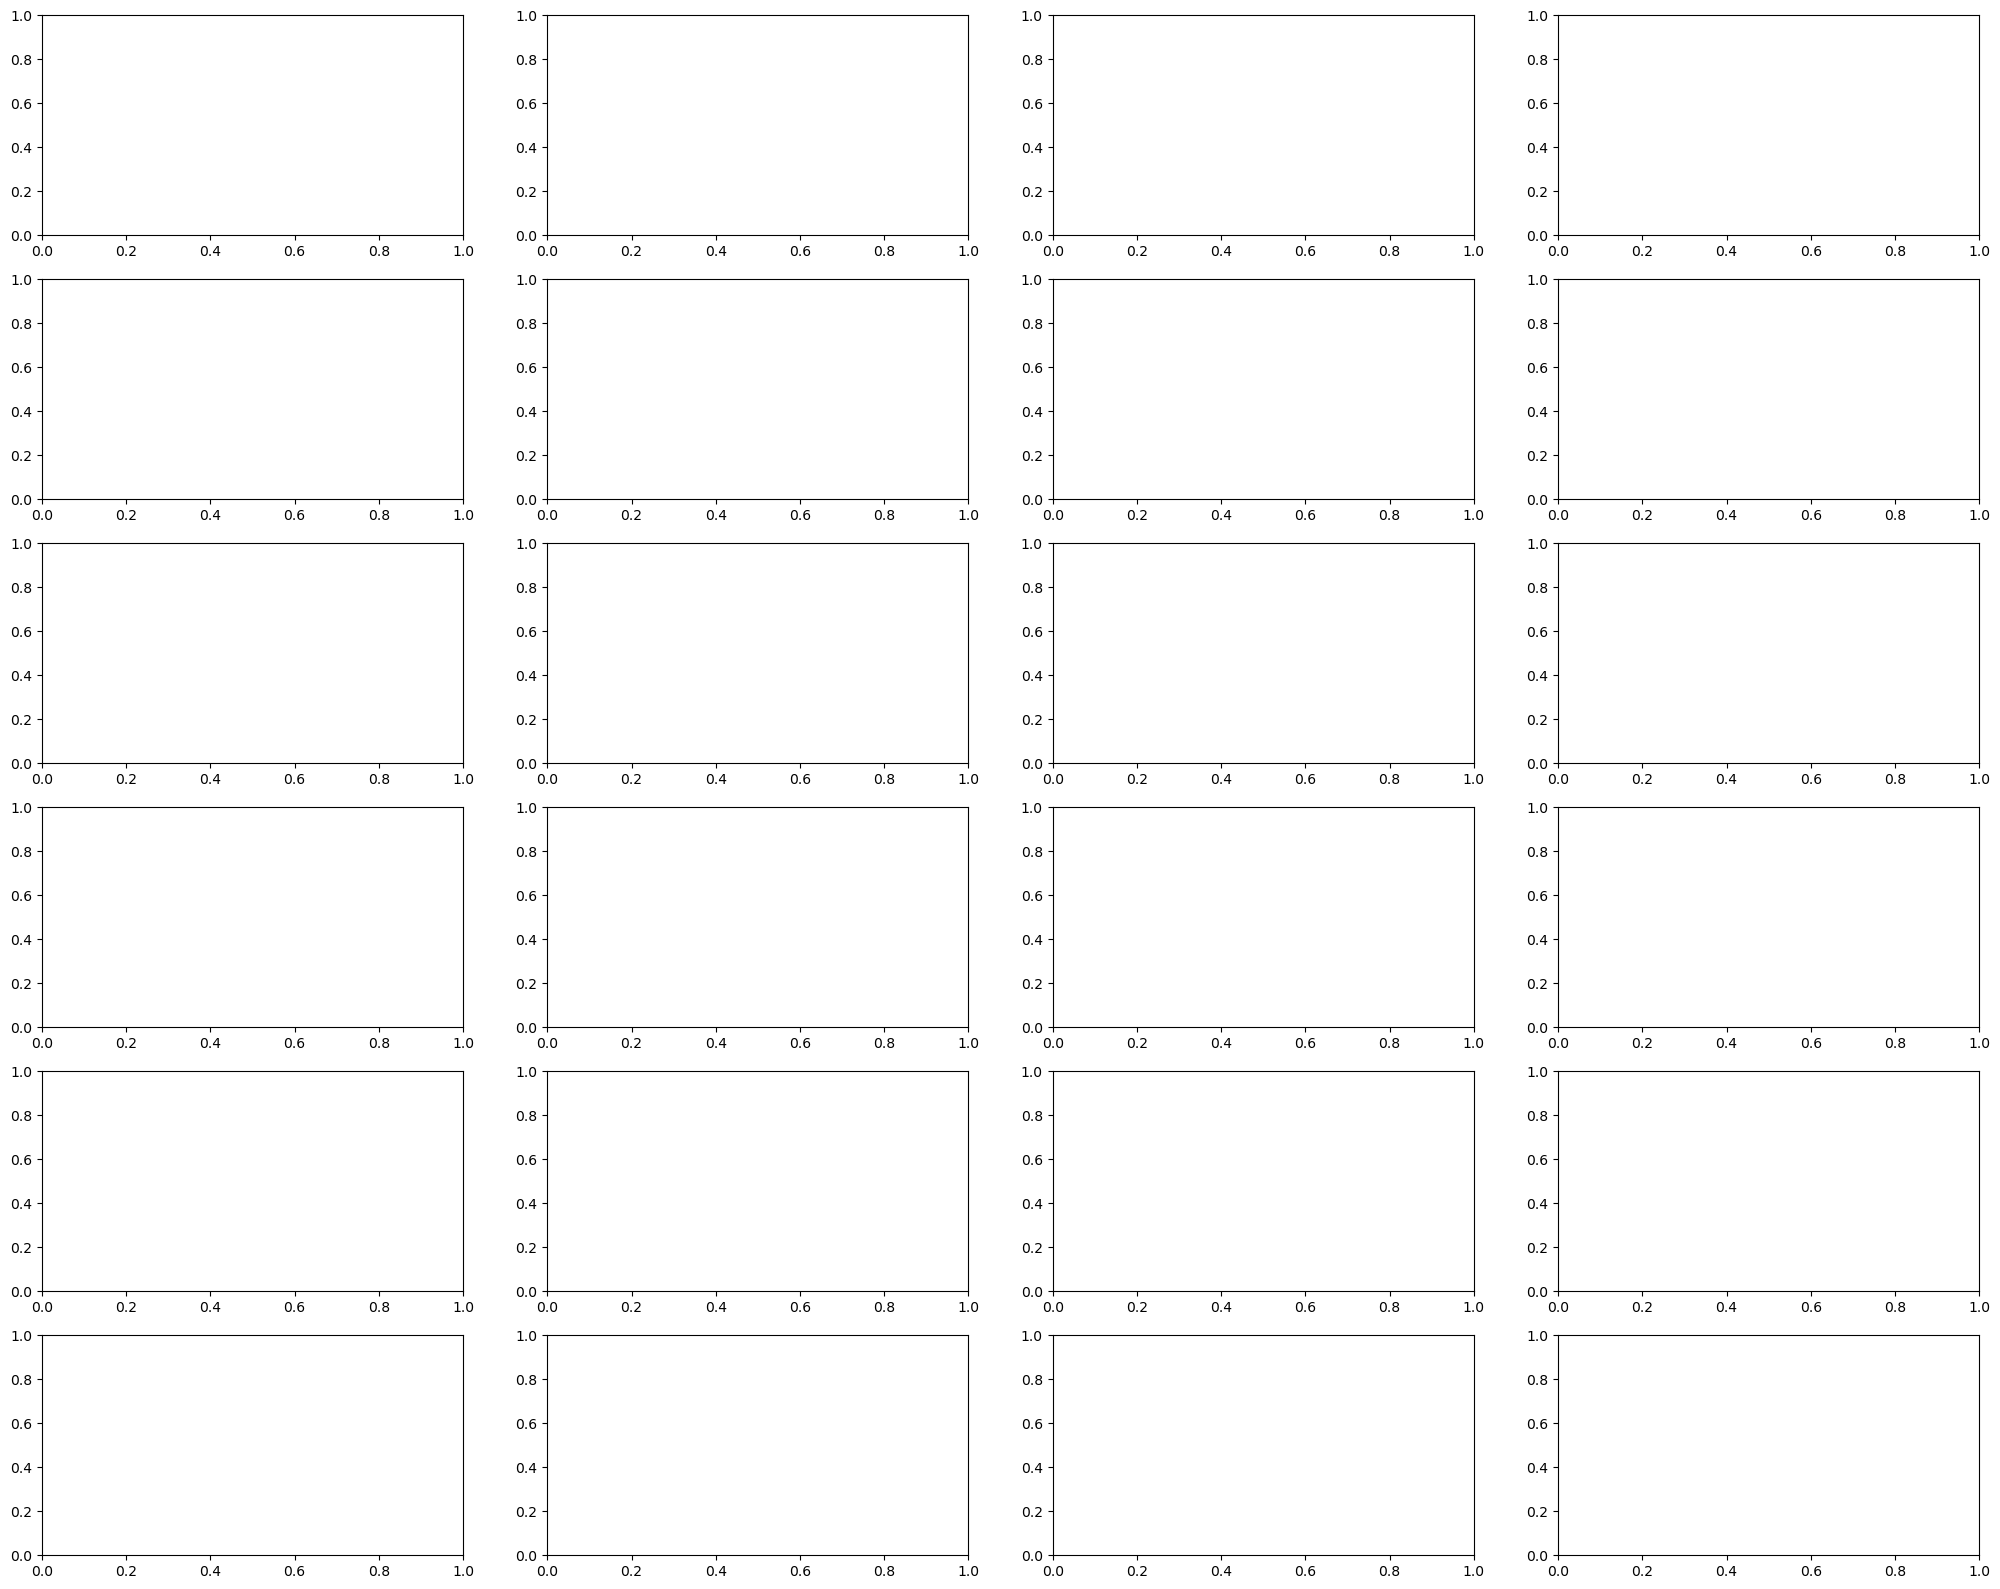

In [ ]:
figure,axis = plt.subplots(6,4, figsize=(25,20))
axis.ravel()

c:\Users\knekv\anaconda3\envs\Python\lib\site-packages\seaborn\categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


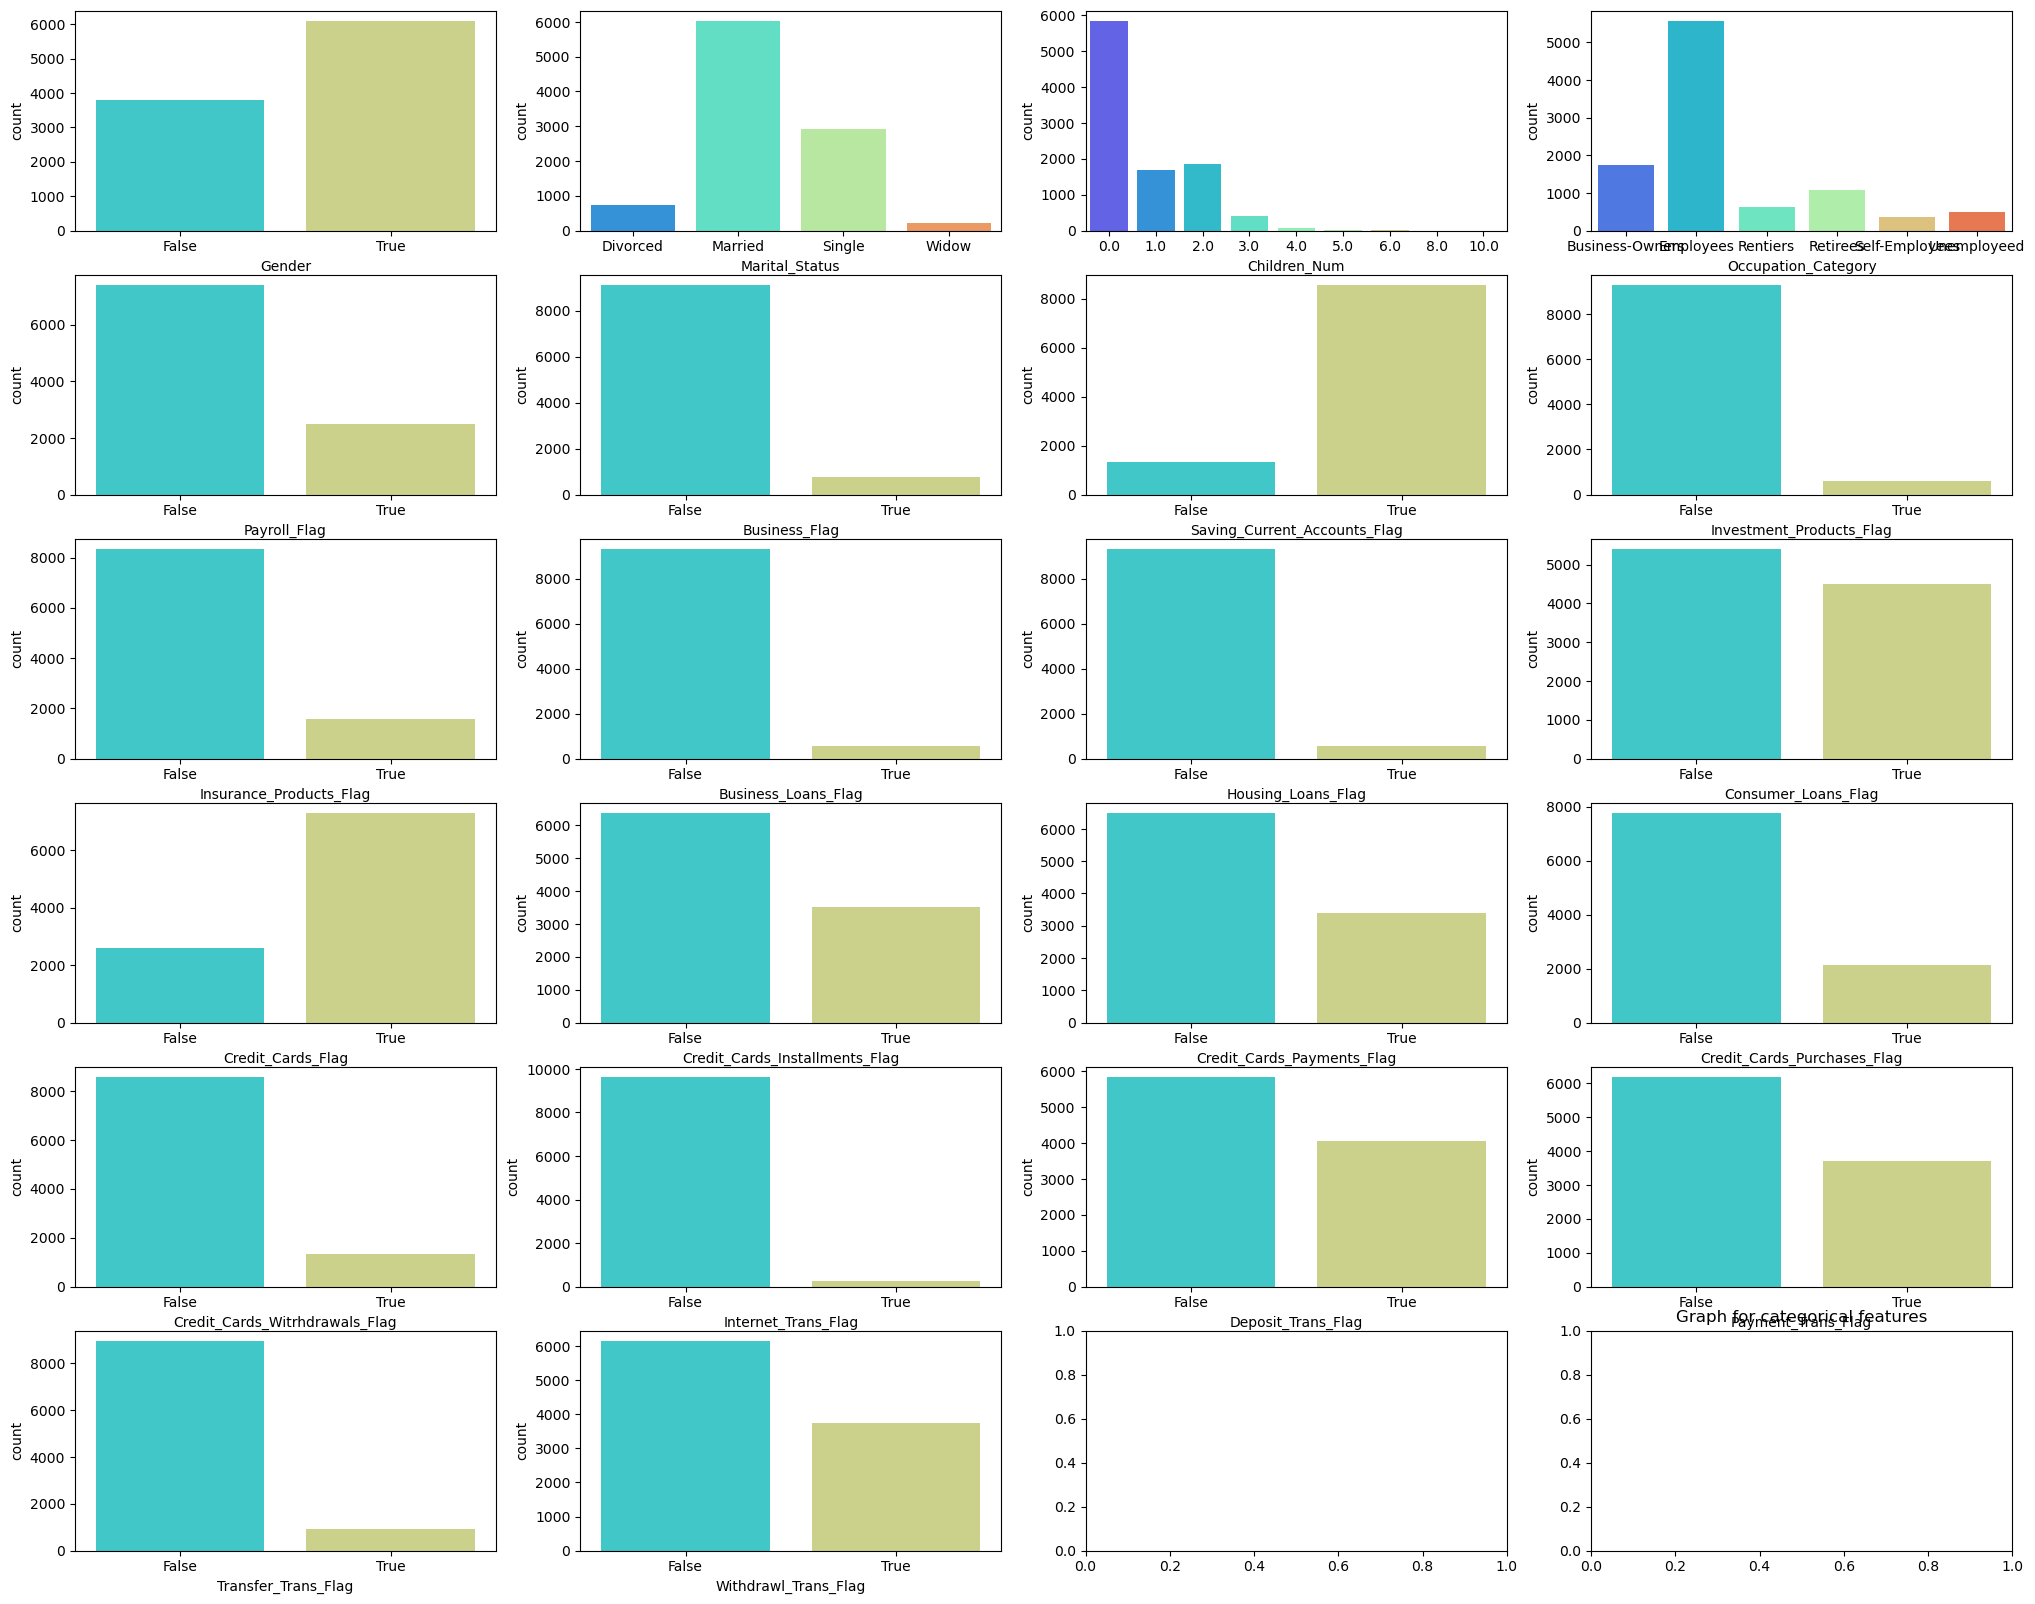

In [ ]:
#Creating a list and graphs for storing categorical features.
#cat_v_list = [i for i in list(dataset.columns) if i not in num_v_list]
dataset['Time_Deposits_Flag']=dataset['Time_Deposits_Flag'].astype('category')

figure,axis = plt.subplots(6,4, figsize=(25,20))

for column,ax in zip(cat_v_list,axis.ravel()):
    sns.countplot(data=dataset[dataset["Time_Deposits_Flag"] == False], x=column, ax = ax, palette='rainbow')

plt.title('Graph for categorical features')

plt.show()



In [ ]:

print(dataset["Time_Deposits_Flag"].value_counts(normalize=True))
sns.catplot(data = dataset, x = "Time_Deposits_Flag", kind = "count", palette = "ch:.79")

False    0.9897
True     0.0103
Name: Time_Deposits_Flag, dtype: float64
